# E-commerce dataset - Association Rules

## Business Understanding

Company that sells mainly in the UK unique all-occasion items, many times to wholesalers. One business problem to address is find out any hidden patterns in the descriptions of customers' transactions. This might empower the decision-making of the marketing on promotions that can be done to certain items that are frequently bought together with other items. This can also help in the forecasting of inventory by seeing if there are any occurrences in particular periods of the year that can anticipated. In general, the **'Description'** variable will provide us wit the items bought in every transactions, which will be used to find Association Rules that might give a better picture on the relations hidden in the data.

## Attribute description

- $InvoiceNo$: is a transactional database where the role of transaction identifier in the transactional database.
- $StockCode$: product item code. It is a 5-digit number uniquely assigned to each distinct product. 
- $Description$: includes the different products purchased in the transaction.
- $Quantity$: amounts of units of products purchased in each transaction. 
- $InvoiceData$: date of purchase. 
- $UnitPrice$: numeric variable for the price per unit. 
- $CustomerID$: unique identifier for each customer. 
- $Country$: stands for the country where the transaction was made. 


The dataset used in this analysis was taken from: https://www.kaggle.com/carrie1/ecommerce-data

In [10]:
#The used libraries are imported

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#The following command is given to render the figures in the notebook
%matplotlib inline

In [11]:
'''
#The following code was used to import the data on Google Colab

print("Mounting your Google Drive ...")

from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive',force_remount=True)
 
path = "/content/drive/MyDrive/BBS/Data Mining/"#You have to update this path
#path = "/content/drive/My Drive/BBS-2021/"#You have to update this path

name = 'data.csv'
'''

'\n#The following code was used to import the data on Google Colab\n\nprint("Mounting your Google Drive ...")\n\nfrom google.colab import drive\ndrive.flush_and_unmount()\ndrive.mount(\'/content/drive\',force_remount=True)\n \npath = "/content/drive/MyDrive/BBS/Data Mining/"#You have to update this path\n#path = "/content/drive/My Drive/BBS-2021/"#You have to update this path\n\nname = \'data.csv\'\n'

In [12]:
'''
from google.colab import drive
drive.mount('/content/drive')
'''

"\nfrom google.colab import drive\ndrive.mount('/content/drive')\n"

# 1 EDA

We'll go about exploring this dataset for some initial insights to better approach the analysis:

In [4]:
df = pd.read_csv('data.csv',encoding="ISO-8859-1") 
# df = pd.read_csv(path+name, encoding="ISO-8859-1") #for google colab
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [13]:
#The number of observations is inspected
df.shape

(541909, 8)

The dataset has 500k+ observations, which is a rich batch for the analysis we're going to perform.

## 1.1 Summary statistics of numerical variables:

The dataset is inspected in its core components through the method `.describe()`. This gives us some important features such as count, mean and std of the quantitative variables, and it shows its quartiles.

In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Here we can observe the presence of unexpected values in the UnitPrice and Quantity columns, as the minimum for these is negative.
This is due to some abnormal transaction that don't contribute to our analysis, therefore we may prefer to drop them.

Before dropping, however, we're going to inspect these elements.

In [15]:
#The transactions with negative unit price are inspected
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/2011 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/2011 14:52,-11062.06,NaN,United Kingdom


In [16]:
#The transactions with negative quantity are inspected
df[df['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [17]:
#The transactions with negative quantity are counted
df[df['Quantity'] < 0].count()

InvoiceNo      10624
StockCode      10624
Description     9762
Quantity       10624
InvoiceDate    10624
UnitPrice      10624
CustomerID      8905
Country        10624
dtype: int64

There are only 2 transactions with negative UnitPrice and 10624 with negative Quantity, in both cases they are few with respect to the total size of 500k+ of the dataframe, so we label them as **outliers** and will get rid of them in the Cleanup.

Now we inspect the variable 'Country', which explains where the order was made.

In [18]:
np.unique(df['Country'])

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

In [19]:
len(df[df['Country'] == 'United Kingdom']) # transactions originating from the UK 

495478

There are transactions from many countries in the world, but the United Kingdom overtakes them by far with a total of 490k+, which is almost the total size of the dataset.

Now we're interested in how many unique customers there are.

In [20]:
len(np.unique(df['CustomerID'])) # This method include all the missing values in the CustomerID column

139452

In [21]:
df[df['CustomerID'].isna()].shape

(135080, 8)

In [22]:
len(df['CustomerID'].unique()) # This method excludes the missing values and is therefore more accurate for the amount of unique customers

4373

This is congruent with what was stated in the description in Kaggle: ".The company mainly sells unique all-occasion gifts. **Many customers of the company are wholesalers.**"" Here we see that the 540k+ transactions were placed by only 139k+ customers. It would be interesting to see the mean quantity and Unit Price per customer. But first we need to check if the dataset contains any **missing values**.

In [23]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

A small percentage of descriptions is missing (0.2%) but on the other hand around 25% of the CustomerIDs are missing. We should consider how to address this problem. 

How about how many different StockCodes the company has?

In [24]:
len(np.unique(df['StockCode']))

4070

They are not so many with respect to the amount of transactions but maybe too many for us to consider in the model? Is it interesting for our model?

***How many unique descriptions do we have?***

In [25]:
uniq_descr = len(df['Description'].unique())
print("The number of unique Description values in the input file is: {}".format(uniq_descr))

The number of unique Description values in the input file is: 4224


# 2 Data Preparation

## 2.1 Cleanup

Before mining association rules, we have to perform some basic preprocessing steps. 

The database has some problems:
1. Some descriptions represent the same item but have different leading or trailing spaces so we will take care of this with the strip() method, 
2. Some InvoiceNo start with a `C`. They are "credit transactions" and must be removed.
3. Several transactions include the item `'POSTAGE'`, which represents the mailing expenses and must be removed.
4. Removing `Descriptions` with the M code, which stands for Manual transactions that do not include any item description.

## 2.2 Removing leading and trailing spaced in `Description`

In [26]:
df['Description'] = df['Description'].str.strip()
print("After cleaning, the number of unique Description values in the input file is: {}".format(len(df['Description'].unique())))

After cleaning, the number of unique Description values in the input file is: 4212


## 2.3 Removing InvoiceNo that start with a `C`

To do this we need to be certain that the column type is a string.

In [27]:
df['InvoiceNo'] = df['InvoiceNo'].astype(str)

Now we can check and then exclude the InvoiceNo's containing a C in as a prefix

In [28]:
df[df['InvoiceNo'].str.contains(pat='C')].shape

(9288, 8)

In [29]:
# Excluding
df = df[~df['InvoiceNo'].str.contains(pat='C')] 
# Checking to see if all were successfully excluded
df[df['InvoiceNo'].str.contains(pat='C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## 2.4 Removing mailing expenses

We do not want to include items which are `POSTAGE` from the Description column, meaning mailing expenses. We will therefore remove these rows. 

Before doing this, the `contains()` method doesn't allow to have any missing values. 

First, we'll check for missing values in the `Description` column and drop them if any are found and then move to the `CustomerID` column.

In [30]:
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/7/2011 18:26,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,12/7/2011 18:31,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,12/7/2011 18:35,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,12/8/2011 10:33,0.0,NaN,United Kingdom


In [31]:
df = df.dropna(axis=0, how='any', subset=['Description'])
# Checking if code executed correctly
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Now we can check, after sampling how many `CustomerID's` are missing:

In [32]:
df['CustomerID'].isna().sum()

133243

We will not work with missing CustomerIDs and will therefore drop them:

In [33]:
df = df.dropna(axis=0, how='any', subset=['CustomerID'])
df['CustomerID'].isna().sum()

0

After doing this we can safely check for POSTAGE, which are transactions that do not include any products in its description but only accounts for postage expenses:

In [34]:
print("There are {} rows containing POSTAGE in Description".format(len(df[df['Description'].str.contains('POSTAGE')]))) 

There are 1115 rows containing POSTAGE in Description


In [35]:
df[df['Description'].str.contains(pat='POSTAGE')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,12/1/2010 8:45,18.0,12583.0,France
386,536403,POST,POSTAGE,1,12/1/2010 11:27,15.0,12791.0,Netherlands
1123,536527,POST,POSTAGE,1,12/1/2010 13:04,18.0,12662.0,Germany
5073,536840,POST,POSTAGE,1,12/2/2010 18:27,18.0,12738.0,Germany
5258,536852,POST,POSTAGE,1,12/3/2010 9:51,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
541198,581493,POST,POSTAGE,1,12/9/2011 10:10,15.0,12423.0,Belgium
541216,581494,POST,POSTAGE,2,12/9/2011 10:13,18.0,12518.0,Germany
541730,581570,POST,POSTAGE,1,12/9/2011 11:59,18.0,12662.0,Germany
541767,581574,POST,POSTAGE,2,12/9/2011 12:09,18.0,12526.0,Germany


## 2.5 Removing Manual (M) transactions

The rows with StockCode 'M' are Manual transactions, and do not include any item description.

In [36]:
df = df[~df['StockCode'].str.contains(pat='M')]
# Check that procedure worked
df[df['StockCode'].str.contains(pat='M')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Let's exclude those rows too:

In [37]:
df = df[~df['Description'].str.contains(pat='POSTAGE')]
print("There are {} rows containing POSTAGE in Description".format(len(df[df['Description'].str.contains('POSTAGE')]))) 

There are 0 rows containing POSTAGE in Description


At the beginning we had **541909** transactions, which after being cleaned up are down to:

In [38]:
print("Transactions after cleaning: {}".format(df.shape[0]))

Transactions after cleaning: 396219


# 3 Sampling

First off, we have too many datapoints to process and will therefore create a sample of data originating from the **UK**.
We want to reduce the number of rows but we will still want to preserve as many datapoints as possible as to not lose any information:

In [39]:
df_sampled = df[df['Country'] == 'United Kingdom'].sample(frac=0.58, replace=False, random_state=101).reset_index()
df_sampled.shape

(205183, 9)

In [40]:
df_sampled.sort_values(by='UnitPrice', ascending=True)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
46663,279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,7/26/2011 12:24,0.0,16818.0,United Kingdom
1508,139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
68339,454464,575579,22089,PAPER BUNTING VINTAGE PAISLEY,24,11/10/2011 11:49,0.0,13081.0,United Kingdom
113150,86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
185073,420404,572893,21208,PASTEL COLOUR HONEYCOMB FAN,5,10/26/2011 14:36,0.0,18059.0,United Kingdom
...,...,...,...,...,...,...,...,...,...
34098,51636,540647,22655,VINTAGE RED KITCHEN CABINET,1,1/10/2011 14:57,295.0,17406.0,United Kingdom
2718,171178,551393,22656,VINTAGE BLUE KITCHEN CABINET,1,4/28/2011 12:22,295.0,14973.0,United Kingdom
67145,82768,543253,22655,VINTAGE RED KITCHEN CABINET,1,2/4/2011 15:32,295.0,14842.0,United Kingdom
88291,222682,556446,22502,PICNIC BASKET WICKER 60 PIECES,1,6/10/2011 15:33,649.5,15098.0,United Kingdom


In [41]:
df_sampled[df_sampled['UnitPrice'] == 0.0].shape # transactions with UnitPrice = 0

(11, 9)

# 4 Feature Extraction 

In order to perform a good clustering, the variables currently in the dataset are not as useful. Therefore, there is a need to create new attributes (feature extraction) based on the ones we already have. For this, we referenced the work about RFM analysis done in: https://www.kaggle.com/fabiendaniel/customer-segmentation. 

## 4.1 Customers total expenditure

We want to see the number of products purchased in every transaction:

In [42]:
num_products_temp = df_sampled.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count().sort_values('InvoiceDate')
num_products =num_products_temp.rename(columns = {'InvoiceDate':'Number of products'})
num_products

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
9805,16168.0,574666,1
9803,16168.0,571169,1
9791,16168.0,549850,1
1229,13106.0,561811,1
...,...,...,...
3947,14096.0,567656,252
3957,14096.0,578270,260
3958,14096.0,579196,296
3959,14096.0,580727,319


In [43]:
num= np.median(num_products['Number of products'])
num

9.0

We can observe the existance of users who only came once and only purchased one product (at the begining of the above dataFrame) and  from the other side frequent users that buy a large number of items in each order.

In [44]:
df_segm=df_sampled.copy()

In [45]:
df_segm['TotalPrice'] = df_segm['UnitPrice'] * df_segm['Quantity']
df_segm.sort_values('TotalPrice')

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
33572,33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.00,16560.0,United Kingdom,0.00
191905,130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.00,13239.0,United Kingdom,0.00
46707,56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.00,15107.0,United Kingdom,0.00
105450,502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,11/25/2011 15:57,0.00,13256.0,United Kingdom,0.00
46663,279324,561284,22167,OVAL WALL MIRROR DIAMANTE,1,7/26/2011 12:24,0.00,16818.0,United Kingdom,0.00
...,...,...,...,...,...,...,...,...,...,...
188342,52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,1/11/2011 12:55,2.10,15749.0,United Kingdom,6539.40
1629,348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,9/20/2011 11:05,5.06,17450.0,United Kingdom,7144.72
78267,222680,556444,22502,PICNIC BASKET WICKER 60 PIECES,60,6/10/2011 15:28,649.50,15098.0,United Kingdom,38970.00
91502,61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.60


To obtain total order price it is necessary to collect all the purchases made during a single transaction.

In [46]:
basket_price_temp = df_segm.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['TotalPrice'].sum() #price for a single order
basket_price_temp.sort_values('TotalPrice') 

# we are not interested in TotalPrice == 0
basket_price = basket_price_temp[basket_price_temp['TotalPrice'] > 0]
basket_price.sort_values('TotalPrice')

,CustomerID,InvoiceNo,TotalPrice
1965,13405.0,568375,0.001
6089,14800.0,570554,0.380
2492,13588.0,575878,0.390
14273,17750.0,580515,0.390
5953,14744.0,542736,0.550
...,...,...,...
8645,15749.0,550461,14551.400
13351,17450.0,567423,18985.120
6874,15098.0,556444,38970.000
0,12346.0,541431,77183.600


To see how our customers are distributed based on their expenditure , we created a range of prices (100,500,1000,5000):

In [47]:
p_range = [100, 500, 1000, 5000] #range of price
count_price = []
for i, price in enumerate(p_range):
    if i == 0: continue
    val = basket_price[(basket_price['TotalPrice'] < price) &
                       (basket_price['TotalPrice'] > p_range[i-1])]['TotalPrice'].count()
    count_price.append(val)
count_price

[9960, 958, 399]

As we can see most of our customers spend between 100 and 500 at each order. 

Creating new column $amount$ - total amount of purchase per customerID

In [48]:
amount=df_segm.groupby('CustomerID').sum()['TotalPrice']
amount= amount.reset_index()
amount=amount.rename(columns={'TotalPrice':'Amount'})
df_new=amount
df_new

,CustomerID,Amount
0,12346.0,77183.60
1,12747.0,2714.24
2,12748.0,18721.18
3,12749.0,2403.12
4,12820.0,585.67
...,...,...
3876,18280.0,130.35
3877,18281.0,47.37
3878,18282.0,102.93
3879,18283.0,1195.69


Creating new column  $Frequency$  - number of times customer orderd

In [49]:
#calculate frequency
frequency= df_segm.groupby('CustomerID')['InvoiceNo'].count()
frequency= frequency.reset_index()
frequency.columns = ['CustomerID', 'Frequency']

#add column to df_new
df_new['Frequency']=frequency['Frequency']
df_new

,CustomerID,Amount,Frequency
0,12346.0,77183.60,1
1,12747.0,2714.24,66
2,12748.0,18721.18,2619
3,12749.0,2403.12,120
4,12820.0,585.67,37
...,...,...,...
3876,18280.0,130.35,7
3877,18281.0,47.37,5
3878,18282.0,102.93,8
3879,18283.0,1195.69,440


Creating new column $LastTime$ - how many days before customer did a transaction based on the last date available in the dataset. 

In [50]:
df_segm['InvoiceDate'] = pd.to_datetime(df_segm['InvoiceDate'])
#find the day of last transaction
max_date = df_segm['InvoiceDate'].max()


# add days difference in the dataframe
df_segm['days_diff'] = max_date - df_segm['InvoiceDate']

#min days_diff by customerID
last_time = df_segm.groupby('CustomerID')['days_diff'].min()
last_time=last_time.reset_index()

df_new['LastTime'] = last_time['days_diff'].dt.days

df_new

,CustomerID,Amount,Frequency,LastTime
0,12346.0,77183.60,1,325
1,12747.0,2714.24,66,1
2,12748.0,18721.18,2619,0
3,12749.0,2403.12,120,3
4,12820.0,585.67,37,2
...,...,...,...,...
3876,18280.0,130.35,7,277
3877,18281.0,47.37,5,180
3878,18282.0,102.93,8,7
3879,18283.0,1195.69,440,3


What we cannot fail to observe is that customer 2 is a loyal customer of ours. In fact, he spent a large amount of money, order frequently and he also ordered the day of the last transaction.

All calculation we did are  based on distance, so scaling is needed.
Z-score is a variation of scaling that represents the number of standard deviations away from the mean.

In [51]:
#import zscore
from scipy.stats import zscore
#we are not using costumerid
df_scaled=df_new[['Amount','Frequency','LastTime']] 
#scaling of data
df_scaled = df_scaled.apply(zscore) 
df_scaled.head()

,Amount,Frequency,LastTime
0,15.369466,-0.407786,2.332993
1,0.322556,0.103238,-0.908495
2,3.556839,20.174680,-0.918499
3,0.259693,0.527781,-0.888485
4,-0.107532,-0.124757,-0.898490


## 4.2 Clustering

Finding natural groups of customers in our dataset is not only useful per se, but it provides a better understanding of how the association rules are supported. For a strategic marketing campaign, for example, it is important to understand if the association rule is uniformly distributed among our overall target, or if it is influenced by the specific kind of customer (wealthy, loyal...)
For this reason the association rule analysis will be performed on the overall dataset and then specifically on each cluster for comparison purposes.

### 4.2.1 KMeans

In [52]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

The distortions found: [8427.286290251197, 5465.6299674981055, 3747.080525099062, 2680.8482471239568, 2096.9721764822334, 1690.5036965162165, 1421.1362294290882, 1214.5389443232302, 1080.6520352293442]


The Silhouette scores found: [0.5714716697766663, 0.5968618519273952, 0.5920550605785938, 0.6174600379401814, 0.5965083357113402, 0.5302630934146219, 0.5312234852831851, 0.47976204074322054, 0.4255739386415088]


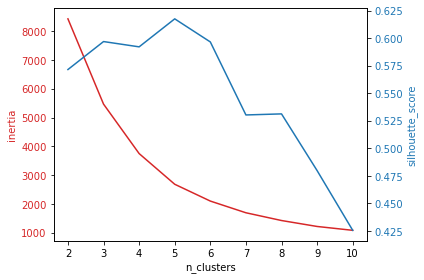

In [56]:
n_clusters= range(2,11)
inertia=[] # distortion
scores=[] # silhouette

for k in n_clusters:
    km=KMeans(k)
    label=km.fit_predict(df_scaled)
    inertia.append(km.inertia_)
    scores.append(silhouette_score(df_scaled,label))
    
print("The distortions found: {}".format(inertia))
print("\n")
print("The Silhouette scores found: {}".format(scores))

t = n_clusters
data1 = inertia
data2 = scores

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('n_clusters')
ax1.set_ylabel('inertia', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette_score', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

For choosing the number of clusters, we found an evident elbow in correspondence of n=3 and a less evident elbow at n=5, with the highest value of the silhouette.

We experimented both paths, and we found that n=5 provided a more precise segmentation of the outliers (see pairplot). However, these outliers are few and not enough to provide insight about the association rules. So, for the rules mining, the choice will be n=3.

In [57]:
from sklearn.cluster import KMeans

n_cluster_b = 3 
kmeans=KMeans(n_cluster_b) # initialize
labels=kmeans.fit_predict(df_scaled) # fit and predict

df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')

df_kmeans = df_new.join(df_labels)
df_kmeans.head()

,CustomerID,Amount,Frequency,LastTime,labels
0,12346.0,77183.60,1,325,2
1,12747.0,2714.24,66,1,1
2,12748.0,18721.18,2619,0,2
3,12749.0,2403.12,120,3,1
4,12820.0,585.67,37,2,1


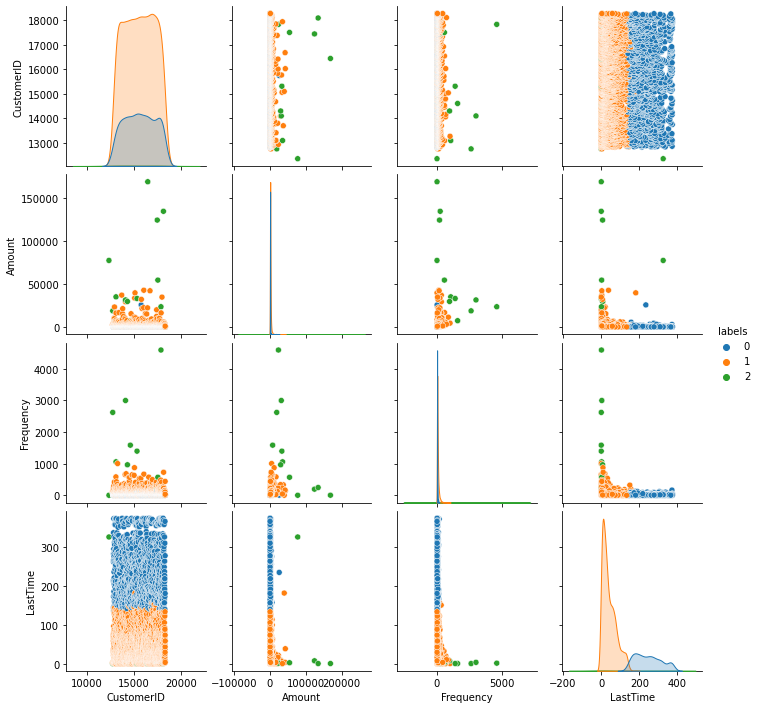

In [58]:
sns.pairplot(df_kmeans,diag_kind='kde',hue='labels')

## 4.3 Cluster Characteristics


We're going to count its elements, see the median of its varibales and count its unique customers.
The same analysis will be performed for the other clusters.

In [59]:
# cluster 0 
cl0= df_kmeans[df_kmeans['labels']==0]
print('Number of customers in cluster:{}'.format(len(cl0['CustomerID'].unique())))

#print median of frequency
cl0f= np.median(cl0['Frequency'])
print('Median of number of orders:{}'.format(cl0f))

#print median of amount 
cl0a=np.median(cl0['Amount'])
print('Median of amount spent by customer:{}'.format(cl0a))

#print median of last time acqusition 
cl0lt=np.median(cl0['LastTime'])
print('Median of last time order:{}'.format(cl0lt))

Number of customers in cluster:979
Median of number of orders:10.0
Median of amount spent by customer:172.87000000000003
Median of last time order:239.0


This cluster is the smallest one and it is made up of the most valuable and loyal customers in the database. They are high spenders, that typically make orders very frequently.

In [60]:
# cluster 1
cl1= df_kmeans[df_kmeans['labels']==1]
print('Number of customers in cluster:{}'.format(len(cl1['CustomerID'].unique())))

#print median of frequency
cl1f= np.median(cl1['Frequency'])
print('Median of number of orders:{}'.format(cl1f))

#print median of amount 
cl1a=np.median(cl1['Amount'])
print('Median of amount spent by customer:{}'.format(cl1a))

#print median of last time acqusition 
cl1lt=np.median(cl1['LastTime'])
print('Median of last time order:{}'.format(cl1lt))

Number of customers in cluster:2890
Median of number of orders:33.0
Median of amount spent by customer:519.8300000000002
Median of last time order:30.0


This cluster is made up of customers who buy quite a lot from us but are not yet our best customers. This cluster is composed by a huge number of customers and it could be very profitable for the company to try to move them in the cluster of extremally loyal customers.

In [61]:
# cluster 2 
cl2= df_kmeans[df_kmeans['labels']==2]
print('Number of customers in cluster:{}'.format(len(cl2['CustomerID'].unique())))

#print median of frequency
cl2f= np.median(cl2['Frequency'])
print('Median of number of orders:{}'.format(cl2f))

#print median of amount 
cl2a=np.median(cl2['Amount'])
print('Median of amount spent by customer:{}'.format(cl2a))

#print median of last time acqusition 
cl2lt=np.median(cl2['LastTime'])
print('Median of last time order:{}'.format(cl2lt))

Number of customers in cluster:12
Median of number of orders:1011.0
Median of amount spent by customer:34008.6250000001
Median of last time order:1.5


This cluster is composed by our less loyal customers. As we can observe they order rarely and also the last time order is almost a yera ago. This can indicate that they are our old customers. Company can think to encourage them to come back with a specific offers.

### 4.2.2 Hierarchical Clustering


We decided to do another algorithm for clustering to compare the results.

Hierarchical cluster analysis, is an algorithm that groups similar objects into groups called clusters. The endpoint is a set of clusters, where each cluster is distinct from each other cluster, and the objects within each cluster are broadly similar to each other.

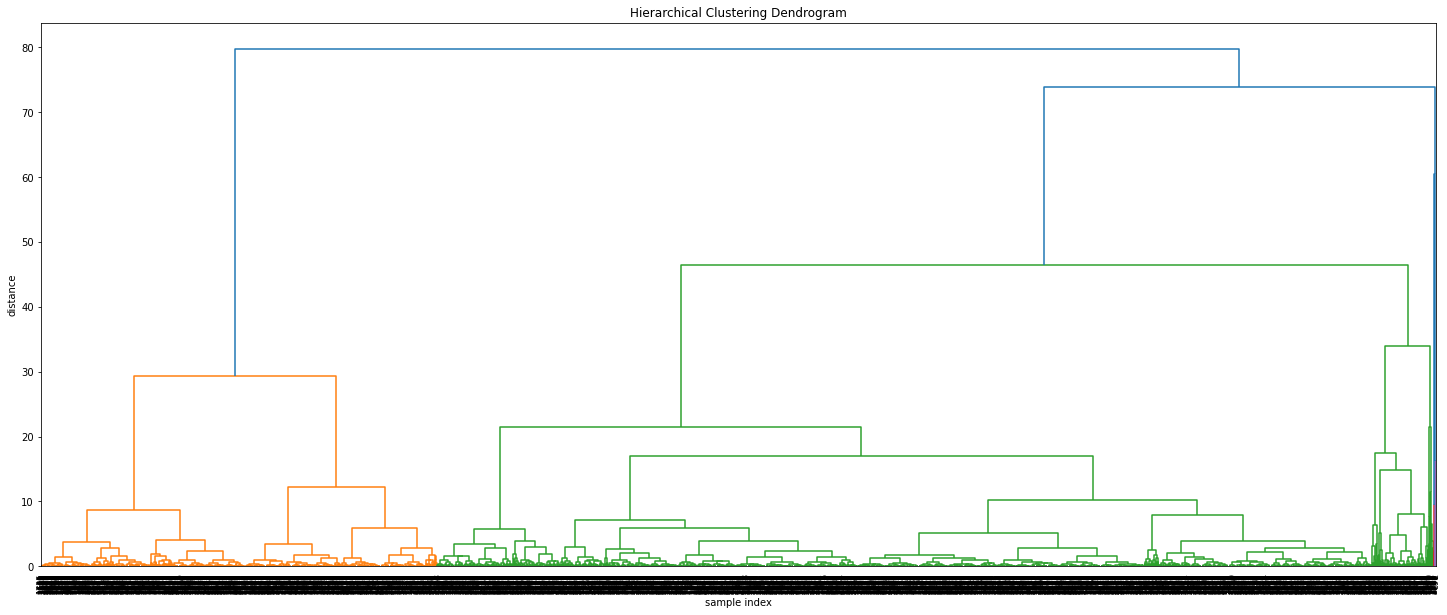

In [62]:
from scipy.cluster.hierarchy import linkage,dendrogram

Z = linkage(df_scaled, method='ward',metric='euclidean')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  
    leaf_font_size=8.,  
)
plt.show()

Dendrogram Truncation

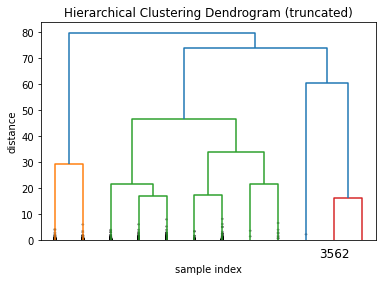

In [63]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last merged clusters
    p=12,  # show only the last merged clusters
    show_leaf_counts=False,  # otherwise numbers in brackets are counts
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering
hie_clus = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
labels = hie_clus.fit_predict(df_scaled)


df_labels_h = pd.DataFrame(labels, columns = list(['labels']))
df_labels_h['labels'] = df_labels_h['labels'].astype('category')


df_h = df_new.join(df_labels_h)
df_h



,CustomerID,Amount,Frequency,LastTime,labels
0,12346.0,77183.60,1,325,2
1,12747.0,2714.24,66,1,2
2,12748.0,18721.18,2619,0,0
3,12749.0,2403.12,120,3,2
4,12820.0,585.67,37,2,2
...,...,...,...,...,...
3876,18280.0,130.35,7,277,1
3877,18281.0,47.37,5,180,1
3878,18282.0,102.93,8,7,2
3879,18283.0,1195.69,440,3,2


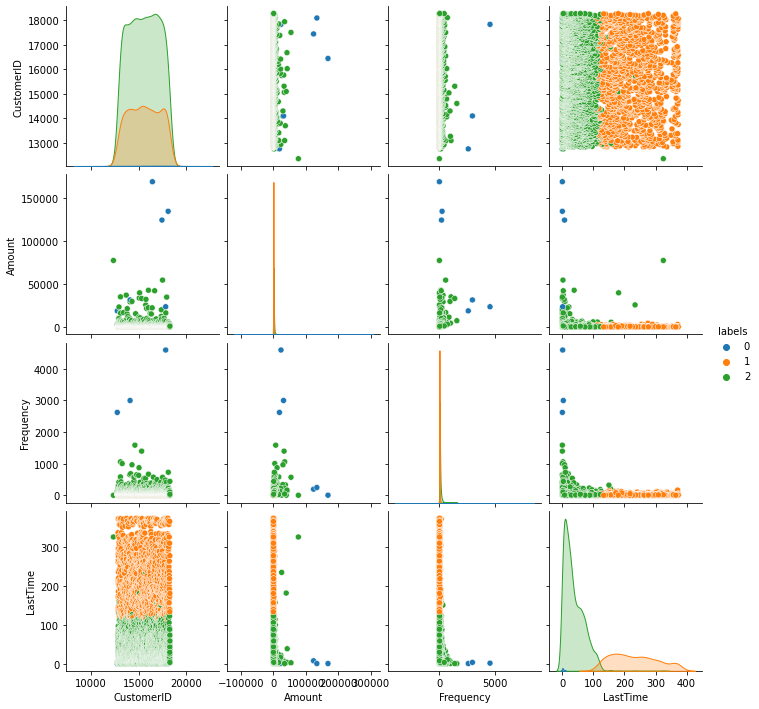

In [65]:
sns.pairplot(df_h,hue='labels')

In [66]:
# cluster 0 
cl0_h= df_h[df_h['labels']==0]
print('Number of customers in cluster:{}'.format(len(cl0_h['CustomerID'].unique())))

#print median of frequency
cl0f_h= np.median(cl0_h['Frequency'])
print('Median of number of orders:{}'.format(cl0f_h))

#print median of amount 
cl0a_h=np.median(cl0_h['Amount'])
print('Median of amount spent by customer:{}'.format(cl0a_h))

#print median of last time acqusition 
cl0lt_h=np.median(cl0_h['LastTime'])
print('Median of last time oredr:{}'.format(cl0lt_h))

Number of customers in cluster:6
Median of number of orders:1432.5
Median of amount spent by customer:77692.51000000005
Median of last time oredr:0.5


In [67]:
#cluster 1
cl1_h= df_h[df_h['labels']==1]
print('Number of customers in cluster:{}'.format(len(cl1_h['CustomerID'].unique())))

#print median of frequency
cl1f_h= np.median(cl1_h['Frequency'])
print('Median of number of orders:{}'.format(cl1f_h))

#print median of amount 
cl1a_h=np.median(cl1_h['Amount'])
print('Median of amount spent by customer:{}'.format(cl1a_h))

#print median of last time acqusition 
cl1lt_h=np.median(cl1_h['LastTime'])
print('Median of last time order:{}'.format(cl1lt_h))

Number of customers in cluster:1101
Median of number of orders:11.0
Median of amount spent by customer:180.02999999999997
Median of last time order:222.0


In [68]:
# cluster 2 
cl2_h= df_h[df_h['labels']==2]
print('Number of customers in cluster:{}'.format(len(cl2_h['CustomerID'].unique())))

#print median of frequency
cl2f_h= np.median(cl2_h['Frequency'])
print('Median of number of orders:{}'.format(cl2f_h))

#print median of amount 
cl2a_h=np.median(cl2_h['Amount'])
print('Median of amount spent by customer:{}'.format(cl2a_h))

#print median of last time acqusition 
cl2lt_h=np.median(cl2_h['LastTime'])
print('Median of last time order:{}'.format(cl2lt_h))

Number of customers in cluster:2774
Median of number of orders:34.0
Median of amount spent by customer:530.6299999999999
Median of last time order:28.0



As we can see the clusters are very similar to the one we obtain with Kmeans. In fact we see clear 3 clusters that are: the loyal customers, potential loyal customers and old(not loyal customers). The cluster of loyal customers in this case is even smaller (just 6 customers), they can be also consider outliers.


## 4.4 Encoding & Preparing Basket-set by Cluster 

**Merge transaction data and cluster information**

In [69]:
cl_info=pd.concat([cl0,cl1,cl2])
cl_info

,CustomerID,Amount,Frequency,LastTime,labels
5,12821.0,52.40,3,213,0
12,12829.0,142.05,7,336,0
14,12831.0,34.20,1,261,0
16,12833.0,182.92,11,144,0
17,12834.0,214.58,12,282,0
...,...,...,...,...,...
2575,16446.0,168472.50,3,0,2
3286,17450.0,124007.59,194,7,2
3328,17511.0,54389.42,570,2,2
3562,17841.0,23481.07,4590,1,2


In [70]:
df_sampled_cluster=pd.merge(df_sampled,cl_info, on="CustomerID")
df_sampled_cluster

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Frequency,LastTime,labels
0,171944,551471,85088,CANDY SPOT HAND BAG,2,4/28/2011 16:40,2.10,16370.0,United Kingdom,688.68,127,81,1
1,346488,567185,84378,SET OF 3 HEART COOKIE CUTTERS,3,9/18/2011 15:55,1.45,16370.0,United Kingdom,688.68,127,81,1
2,300822,563214,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,8/14/2011 12:56,1.95,16370.0,United Kingdom,688.68,127,81,1
3,171928,551471,22652,TRAVEL SEWING KIT,1,4/28/2011 16:40,1.65,16370.0,United Kingdom,688.68,127,81,1
4,346484,567185,85099F,JUMBO BAG STRAWBERRY,5,9/18/2011 15:55,2.08,16370.0,United Kingdom,688.68,127,81,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
205178,312950,564419,15039,SANDALWOOD FAN,20,8/25/2011 11:09,0.85,16093.0,United Kingdom,17.00,1,106,1
205179,361823,568383,82494L,WOODEN FRAME ANTIQUE WHITE,12,9/27/2011 9:39,2.95,13514.0,United Kingdom,76.90,2,73,1
205180,361824,568383,23048,SET OF 10 LANTERNS FAIRY LIGHT STAR,10,9/27/2011 9:39,4.15,13514.0,United Kingdom,76.90,2,73,1
205181,488297,577808,22727,ALARM CLOCK BAKELIKE RED,4,11/22/2011 8:28,3.75,13403.0,United Kingdom,15.00,1,17,1


**Encoder for association rules(preparing basket-set)**

In [71]:
def encoder_ar(encoding_df):
 gr = encoding_df.groupby(by=['InvoiceNo', 'Description'])['Quantity'].sum()  #Sum quantities grouped by InvoiceNo and Description
 gr_unstack = gr.unstack(level=-1) #Pivot the dataframe using unstack()
 gr_encoded = gr_unstack.fillna(0) #The apriori algorithm does not accept NaN values and will therefore will them as 0:

 def encode_units(num):  #Map positive values to 1
   if num <= 0:
        return 0
   else:
        return 1
 basket_sets = gr_encoded.applymap(encode_units)
 
 return basket_sets    

**Preparing basket-set by cluster**

In [72]:
df_sampled_all=df_sampled_cluster
df_sampled_cl0=df_sampled_cluster[df_sampled_cluster["labels"]==0]
df_sampled_cl1=df_sampled_cluster[df_sampled_cluster["labels"]==1]
df_sampled_cl2=df_sampled_cluster[df_sampled_cluster["labels"]==2]

basket_sets_all = encoder_ar(df_sampled_all)
basket_sets_cl0 = encoder_ar(df_sampled_cl0)
basket_sets_cl1 = encoder_ar(df_sampled_cl1)
basket_sets_cl2 = encoder_ar(df_sampled_cl2)

# 5 Mining Association Rules

Now that the data is structured properly, we can generate frequent item sets that have a support of at least 7% (this number was chosen so that we can get enough useful examples):

- generate the `frequent_itemsets` with `apriori`, setting `min_support=0.01` and `use_colnames=True`
- generate the `rules` with `association_rules` using `metric="lift"` and `min_threshold=1`
- show the rules

In [73]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 5.1. Mining rules with fixed threshold

### 5.1.1 All customer 

In [74]:
frequent_itemsets_all = apriori(basket_sets_all, min_support=0.01, use_colnames=True)
rules_all = association_rules(frequent_itemsets_all, metric='lift', min_threshold=1)

In [75]:
#pd.set_option('display.max_rows', 700) #to change the number of rows to show
rules_all

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.027526,0.023495,0.010519,0.382151,16.265495,0.009872,1.580492
1,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.023495,0.027526,0.010519,0.447721,16.265495,0.009872,1.760839
2,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.051461,0.030234,0.010582,0.205630,6.801224,0.009026,1.220799
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.030234,0.051461,0.010582,0.350000,6.801224,0.009026,1.459290
4,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.037604,0.030927,0.010078,0.268007,8.665732,0.008915,1.323882
5,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.030927,0.037604,0.010078,0.325866,8.665732,0.008915,1.427603
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.037604,0.041446,0.010708,0.284757,6.870523,0.009149,1.340179
7,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.041446,0.037604,0.010708,0.258359,6.870523,0.009149,1.297657
8,(LUNCH BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.041446,0.030927,0.011023,0.265957,8.599471,0.009741,1.320186
9,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.030927,0.041446,0.011023,0.356415,8.599471,0.009741,1.489398


### 5.1.2 cluster0

In [76]:
frequent_itemsets_cl0 = apriori(basket_sets_cl0, min_support=0.01, use_colnames=True)
rules_cl0 = association_rules(frequent_itemsets_cl0, metric='lift', min_threshold=1)

In [77]:
#pd.set_option('display.max_rows', 700) #to change the number of rows to show
rules_cl0

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(WHITE HANGING HEART T-LIGHT HOLDER),(ASSORTED COLOUR BIRD ORNAMENT),0.082628,0.045543,0.011061,0.133858,2.939145,0.007297,1.101964
1,(ASSORTED COLOUR BIRD ORNAMENT),(WHITE HANGING HEART T-LIGHT HOLDER),0.045543,0.082628,0.011061,0.242857,2.939145,0.007297,1.211623
2,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024723,0.028627,0.012362,0.500000,17.465909,0.011654,1.942746
3,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.028627,0.024723,0.012362,0.431818,17.465909,0.011654,1.716487
4,(REGENCY CAKESTAND 3 TIER),(GREEN REGENCY TEACUP AND SAUCER),0.076122,0.028627,0.015615,0.205128,7.165501,0.013436,1.222050
5,(GREEN REGENCY TEACUP AND SAUCER),(REGENCY CAKESTAND 3 TIER),0.028627,0.076122,0.015615,0.545455,7.165501,0.013436,2.032531
6,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.031230,0.028627,0.011061,0.354167,12.371686,0.010166,1.504061
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.028627,0.031230,0.011061,0.386364,12.371686,0.010166,1.578737
8,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.033182,0.033182,0.011711,0.352941,10.636678,0.010610,1.494174
9,(HEART OF WICKER SMALL),(HEART OF WICKER LARGE),0.033182,0.033182,0.011711,0.352941,10.636678,0.010610,1.494174


### 5.1.3 cluster1

In [78]:
frequent_itemsets_cl1 = apriori(basket_sets_cl1, min_support=0.01, use_colnames=True)
rules_cl1 = association_rules(frequent_itemsets_cl1, metric='lift', min_threshold=1)

In [79]:
#pd.set_option('display.max_rows', 700) #to change the number of rows to show
rules_cl1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.026011,0.031243,0.010979,0.422096,13.510069,0.010167,1.676329
1,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.031243,0.026011,0.010979,0.351415,13.510069,0.010167,1.501713
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.028369,0.023285,0.010611,0.374026,16.062995,0.009950,1.560312
3,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.023285,0.028369,0.010611,0.455696,16.062995,0.009950,1.785089
4,(JUMBO BAG RED RETROSPOT),(JUMBO BAG PINK POLKADOT),0.054012,0.030801,0.011421,0.211460,6.865360,0.009758,1.229105
5,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.030801,0.054012,0.011421,0.370813,6.865360,0.009758,1.503509
6,(LUNCH BAG BLACK SKULL.),(LUNCH BAG PINK POLKADOT),0.038538,0.032348,0.010685,0.277247,8.570648,0.009438,1.338841
7,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.032348,0.038538,0.010685,0.330296,8.570648,0.009438,1.435652
8,(LUNCH BAG BLACK SKULL.),(LUNCH BAG RED RETROSPOT),0.038538,0.043254,0.011200,0.290631,6.719170,0.009533,1.348728
9,(LUNCH BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.043254,0.038538,0.011200,0.258944,6.719170,0.009533,1.297421


In [80]:
rules_desc1 = rules_cl1.sort_values(by=['confidence', 'support'], axis=0, ascending=False)
rules_desc1 = rules_desc1.reset_index(drop=True)
rules_desc1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.023285,0.028369,0.010611,0.455696,16.062995,0.009950,1.785089
1,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED),0.026011,0.031243,0.010979,0.422096,13.510069,0.010167,1.676329
2,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.028369,0.023285,0.010611,0.374026,16.062995,0.009950,1.560312
3,(JUMBO BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.030801,0.054012,0.011421,0.370813,6.865360,0.009758,1.503509
4,(WOODEN FRAME ANTIQUE WHITE),(WOODEN PICTURE FRAME WHITE FINISH),0.029401,0.032201,0.010758,0.365915,11.363454,0.009811,1.526292
5,(LUNCH BAG PINK POLKADOT),(LUNCH BAG RED RETROSPOT),0.032348,0.043254,0.011716,0.362187,8.373487,0.010317,1.500041
6,(ALARM CLOCK BAKELIKE RED),(ALARM CLOCK BAKELIKE GREEN),0.031243,0.026011,0.010979,0.351415,13.510069,0.010167,1.501713
7,(WOODEN PICTURE FRAME WHITE FINISH),(WOODEN FRAME ANTIQUE WHITE),0.032201,0.029401,0.010758,0.334096,11.363454,0.009811,1.457566
8,(LUNCH BAG PINK POLKADOT),(LUNCH BAG BLACK SKULL.),0.032348,0.038538,0.010685,0.330296,8.570648,0.009438,1.435652
9,(LUNCH BAG SUKI DESIGN),(LUNCH BAG RED RETROSPOT),0.032938,0.043254,0.010242,0.310962,7.189208,0.008818,1.388524


### 5.1.4 cluster2

In [81]:
frequent_itemsets_cl2 = apriori(basket_sets_cl2, min_support=0.01, use_colnames=True)
rules_cl2 = association_rules(frequent_itemsets_cl2, metric='lift', min_threshold=1)

In [82]:
#pd.set_option('display.max_rows', 700) #to change the number of rows to show
rules_cl2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(4 IVORY DINNER CANDLES SILVER FLOCK),(GUMBALL COAT RACK),0.022135,0.058594,0.010417,0.470588,8.031373,0.009120,1.778212
1,(GUMBALL COAT RACK),(4 IVORY DINNER CANDLES SILVER FLOCK),0.058594,0.022135,0.010417,0.177778,8.031373,0.009120,1.189295
2,(4 IVORY DINNER CANDLES SILVER FLOCK),(SKULL DESIGN TV DINNER TRAY),0.022135,0.032552,0.010417,0.470588,14.456471,0.009696,1.827402
3,(SKULL DESIGN TV DINNER TRAY),(4 IVORY DINNER CANDLES SILVER FLOCK),0.032552,0.022135,0.010417,0.320000,14.456471,0.009696,1.438036
4,(4 TRADITIONAL SPINNING TOPS),(RETROSPOT TEA SET CERAMIC 11 PC),0.024740,0.044271,0.011719,0.473684,10.699690,0.010624,1.815885
...,...,...,...,...,...,...,...,...,...
2271,"(SET OF 3 WOODEN TREE DECORATIONS, SET OF 3 WO...","(WHITE HANGING HEART T-LIGHT HOLDER, SET OF 3 ...",0.023438,0.011719,0.010417,0.444444,37.925926,0.010142,1.778906
2272,(WHITE HANGING HEART T-LIGHT HOLDER),"(SET OF 3 WOODEN HEART DECORATIONS, SET OF 3 W...",0.057292,0.015625,0.010417,0.181818,11.636364,0.009521,1.203125
2273,(SET OF 3 WOODEN SLEIGH DECORATIONS),"(WHITE HANGING HEART T-LIGHT HOLDER, SET OF 3 ...",0.039062,0.011719,0.010417,0.266667,22.755556,0.009959,1.347656
2274,(SET OF 3 WOODEN TREE DECORATIONS),"(WHITE HANGING HEART T-LIGHT HOLDER, SET OF 3 ...",0.031250,0.010417,0.010417,0.333333,32.000000,0.010091,1.484375


**Organizing rules in descending order:**

In [83]:
# For full sample
rules_desc_all = rules_all.sort_values(by=['confidence', 'support'], axis=0, ascending=False)
rules_desc_all = rules_all.reset_index(drop=True)

# For cluster 0
rules_desc0 = rules_cl0.sort_values(by=['confidence', 'support'], axis=0, ascending=False)
rules_desc0 = rules_desc0.reset_index(drop=True)

# For cluster 1
rules_desc1 = rules_cl1.sort_values(by=['confidence', 'support'], axis=0, ascending=False)
rules_desc1 = rules_desc1.reset_index(drop=True)

# For cluster 2
rules_desc2 = rules_cl2.sort_values(by=['confidence', 'support'], axis=0, ascending=False)
rules_desc2 = rules_desc2.reset_index(drop=True)


## Visualizing the rules

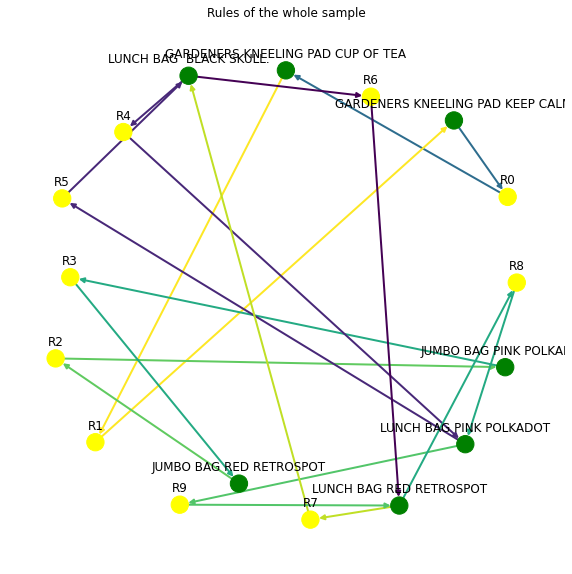

In [93]:
plt.figure(figsize=(10,10))
plt.title("Rules of the whole sample")
draw_graph(rules_desc_all, rules_to_show=10)

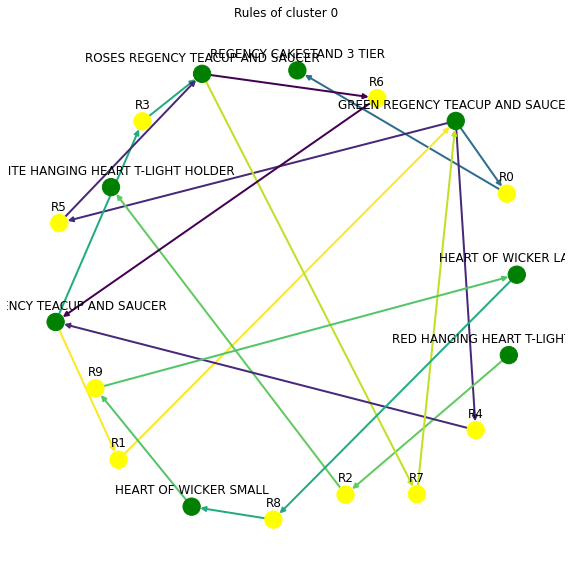

In [94]:
plt.figure(figsize=(10,10))
plt.title("Rules of cluster 0")
draw_graph(rules_desc0, rules_to_show=10)

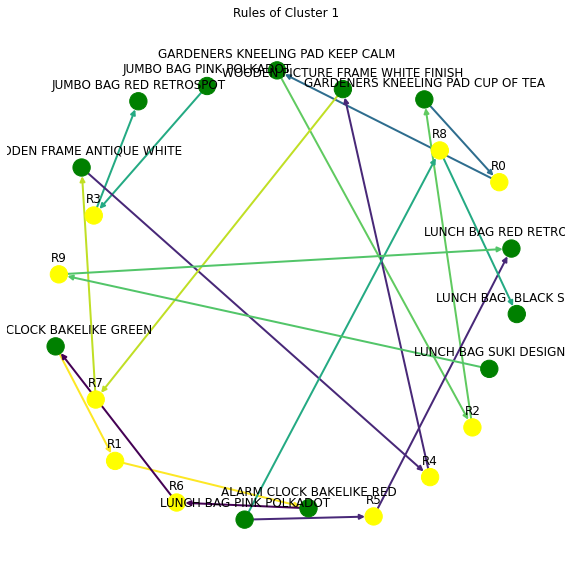

In [91]:
plt.figure(figsize=(10,10))
plt.title("Rules of Cluster 1")
draw_graph(rules_desc1, rules_to_show=10)

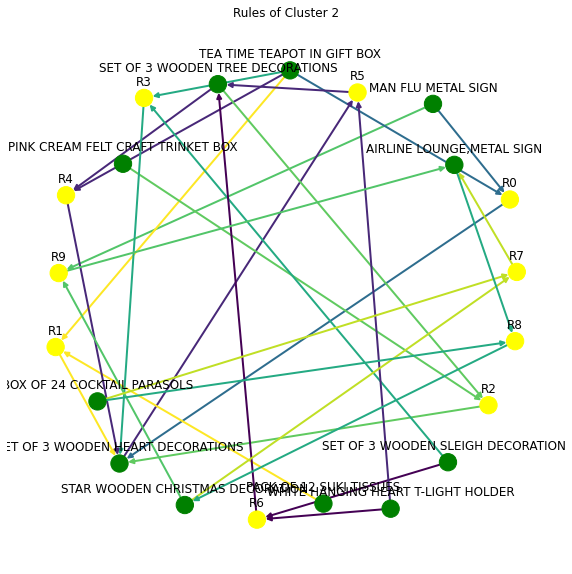

In [92]:
plt.figure(figsize=(10,10))
plt.title("Rules of Cluster 2")
draw_graph(rules_desc2, rules_to_show=10)

## 5.2. Mining rules with various thresholds

**Selecting rules for cluster0**

In [ ]:
from sklearn.model_selection import ParameterGrid
param_dict = {'sup': [0.008,0.01,0.02], 'lift': [1,3,5,7]}
param_grid = ParameterGrid(param_dict)

In [ ]:
i=0
for i in range(0,len(param_grid)):
 frequent_itemsets_cl0 = apriori(basket_sets_cl0, min_support=param_grid[i]["sup"], use_colnames=True)
 nfreq_cl0 =  frequent_itemsets_cl0.shape[0]
 if nfreq_cl0 == 0:  ###when "sup" get 0 frequent items, skip mining rules 
   continue 
 else:
  rules_cl0 = association_rules(frequent_itemsets_cl0, metric='lift', min_threshold=param_grid[i]["lift"])
  nrules_cl0 = rules_cl0.shape[0]
  print("min-sup:",param_grid[i]["sup"],"min-lift:",param_grid[i]["lift"],"frequent items:",nfreq_cl0,"rules:",nrules_cl0)

min-sup: 0.008 min-lift: 1 frequent items: 1537 rules: 2304
min-sup: 0.01 min-lift: 1 frequent items: 969 rules: 792
min-sup: 0.02 min-lift: 1 frequent items: 195 rules: 8
min-sup: 0.008 min-lift: 3 frequent items: 1537 rules: 2296
min-sup: 0.01 min-lift: 3 frequent items: 969 rules: 792
min-sup: 0.02 min-lift: 3 frequent items: 195 rules: 8
min-sup: 0.008 min-lift: 5 frequent items: 1537 rules: 2148
min-sup: 0.01 min-lift: 5 frequent items: 969 rules: 728
min-sup: 0.02 min-lift: 5 frequent items: 195 rules: 8
min-sup: 0.008 min-lift: 7 frequent items: 1537 rules: 1910
min-sup: 0.01 min-lift: 7 frequent items: 969 rules: 606
min-sup: 0.02 min-lift: 7 frequent items: 195 rules: 8


In [ ]:
###For futher selection of rules
#min-sup:0.02 min-lift:7
frequent_itemsets_cl0 = apriori(basket_sets_cl0, min_support=0.01, use_colnames=True)
rules_cl0 = association_rules(frequent_itemsets_cl0, metric='lift', min_threshold=3)
rules_cl0.shape[0]

792

In [ ]:
###For futher selection of rules
print(rules_cl0[rules_cl0["support"]>0.018].shape[0]) #Select rules by support again
#print(rules_cl0[rules_cl0["lift"]>0.0095].shape[0]) #Select rules by lift again

14


# Helper functions

In [54]:
from draw_rules_graph import draw_graph